# 1. KNN
Clustering groups and divide them based on proximity (euclidean distance). probably better to use odd numbers for no split vote.

* Confidence: proportion of closest neighbors
* Accuracy: is the information actually correct?

In [2]:
import numpy as np
from sklearn import preprocessing, cross_validation, neighbors
import pandas as pd

In [3]:
df = pd.read_csv('breast-cancer-wisconsin.data.txt')

In [5]:
df.head()

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
# replace unknown data with an outlier
# in place means save the change
df.replace("?", -99999, inplace=True)

In [7]:
# remove data that is irrelevant to KNN
df.drop(['id'], 1, inplace=True)

In [11]:
# features are everything axcept the class
X = np.array(df.drop(['class'], 1))

# classification is the class
y = np.array(df['class'])

In [12]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2)

In [14]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [15]:
accurracy = clf.score(X_test, y_test)
accurracy

0.99285714285714288

In [37]:
example_measures = np.array([[4,3,2,4, 3,2,4,1 ,1],[4,3,2,1,3,2,4,1 ,1]])
example_measures.reshape(len(example_measures),-1)

array([[4, 3, 2, 4, 3, 2, 4, 1, 1],
       [4, 3, 2, 1, 3, 2, 4, 1, 1]])

In [38]:
prediction = clf.predict(example_measures)
prediction

array([2, 2])

# 2. KNN Algorithm
sum of square dimensional distance rooted

In [50]:
import math
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style

from collections import Counter

style.use('fivethirtyeight')

%matplotlib inline

In [47]:
p1 = np.array([1,3])
p2 = np.array([2,5])

In [48]:
def distance(p1,p2):
    return math.sqrt( (p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

In [49]:
distance(p1,p2)

2.23606797749979

In [51]:
dataset = {'k': [[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_feature = [5,7]

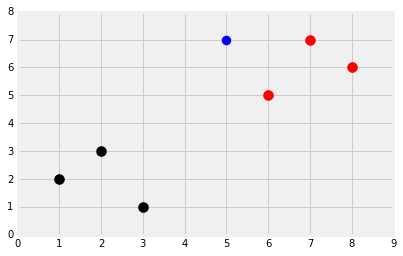

In [54]:
[[ plt.scatter(ii[0], ii[1], s=100, color = i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_feature[0], new_feature[1], s = 100)
plt.show()

In [63]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warning.warn("dataset has less than K points")
    
    # algo
    
    distances = []
    
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance, group])
    
    # sort and take 3 first
    votes = [i[1] for i in sorted(distances)[:k]]
    
    # take the most common one
    vote = Counter(votes).most_common(1)[0][0]
    return vote

In [64]:
result = k_nearest_neighbors(dataset, new_feature)
result

'r'